# Object Identification Object Identification 
1. Using Minimum Distance Classifier
2. Using Naive Bayes Classifier
3. Face Detection


## Minimum Distance Classifier

In [5]:
import csv
import numpy as np
import sys

# Load csv file into numpy as matrices
a = np.loadtxt('wine_train.csv',dtype=float, delimiter=',')

# Define the sample numbers, feature numbers, class numbers
(sampleNum,featureNum)=a.shape
33
classNum = len(np.unique(a[:,13]))
classMean =np.zeros((classNum,featureNum))
label_train_done = np.zeros((sampleNum))

# Calculate class means for minimum-distance-to-class-means classifier, using Euclidean distance
for x in range(0,classNum):
# for y in range(0,13):
    classMean[x,:]=np.mean((a[(a[:,13]==x+1),:]),axis=0)
# Train the classifier to find two features that have minimum error rate.
    training_data=a[:,0:13]
    minError=sys.maxsize
    selectedFeature=(0,1)
    
for s in range(0,featureNum-3):
    for t in range(s+1, featureNum-2):
        for x in range(0,sampleNum):
            distance_Between_Class1_and_DataPoints= np.square(training_data[x,s]-classMean[0,s])+np.square(training_data[x,t]-classMean[0,t])
            distance_Between_Class2_and_DataPoints= np.square(training_data[x,s]-classMean[1,s])+np.square(training_data[x,t]-classMean[1,t])
            distance_Between_Class3_and_DataPoints= np.square(training_data[x,s]-classMean[2,s])+np.square(training_data[x,t]-classMean[2,t])

    if(min(distance_Between_Class1_and_DataPoints,distance_Between_Class2_and_DataPoints,distance_Between_Class3_and_DataPoints)==distance_Between_Class1_and_DataPoints):
        label_train_done[x]=1
    elif(min(distance_Between_Class1_and_DataPoints,distance_Between_Class2_and_DataPoints,distance_Between_Class3_and_DataPoints)==distance_Between_Class2_and_DataPoints):
        label_train_done[x]=2
    else:
        label_train_done[x]=3
        errorNum=(label_train_done != a[:,13]).sum()
        errorRate=errorNum/sampleNum
    if(minError!=min(errorRate,minError)):
        selectedFeature=(s+1,t+1)
        minError=min(errorRate,minError)
        
print ('Selected Feature:', selectedFeature)
print ('Minimum Error:', minError)

Selected Feature: (1, 12)
Minimum Error: 0.9887640449438202


## Naive Bayes Classifier

In [6]:
import pandas as pd
import numpy as np

dataset = pd.read_csv('Pima_Indians_Diabetes.csv')
X = dataset.iloc[:,:9].values
Y = dataset.iloc[:,9].values.ravel()

# Predicting missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean',verbose=0)
imputer = imputer.fit(X)
X = imputer.transform(X)


# Standard Scaler
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X = ss.fit_transform(X)


# Training and Testing
from sklearn.model_selection import train_test_split
TrainX, TestX, TrainY, TestY = train_test_split(X, Y, test_size = 0.25, random_state = 50)


# Naive Bayes Classification
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(TrainX, TrainY)


#%%    Predicting Result
PredY = classifier.predict(TestX)
print("Predicted values of Y",PredY)


#%%    Confusion Matrix
from sklearn.metrics import confusion_matrix
confuse = confusion_matrix(TestY, PredY)
print("Confusion Matrix:",confuse)


# Printing Accuracy
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(TestY, PredY))
print(metrics.classification_report(TestY, PredY))
print(metrics.confusion_matrix(TestY, PredY))

Predicted values of Y [0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 0 1 0 1 1 1 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 1 0 1 1 1 0 1 0 0 1 0 1 0 1 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 1 1 1 1 1
 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0
 1 0 0 0 0 1 1 1 1 1 0 1 0 1 1 1 1 0 1 0 1 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0
 1 1 0 1 0 0 1]
Confusion Matrix: [[95 28]
 [27 42]]
Accuracy: 0.7135416666666666
              precision    recall  f1-score   support

           0       0.78      0.77      0.78       123
           1       0.60      0.61      0.60        69

    accuracy                           0.71       192
   macro avg       0.69      0.69      0.69       192
weighted avg       0.71      0.71      0.71       192

[[95 28]
 [27 42]]


## Face Detection

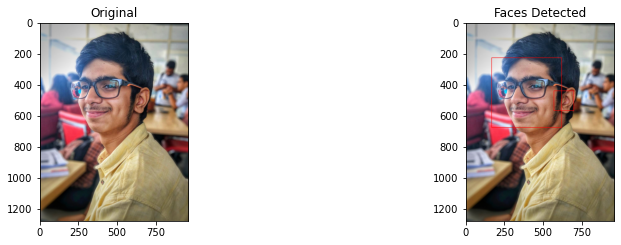

In [8]:
import cv2
import matplotlib.pyplot as plt
# Load the cascade
face_cascade=cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
# Read the input image
img=cv2.imread("C:/Users/psvis/OneDrive/Pictures/Profile_Pic.jpeg")
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
i=img.copy()
# Convert into grayscale
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
# Detect faces
faces=face_cascade.detectMultiScale(gray,1.1,4)
# Draw bounding boxes
for(x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
fig=plt.figure(figsize=(14,8))
ax1=fig.add_subplot(221)
ax2=fig.add_subplot(222)
ax1.title.set_text('Original')
ax1.imshow(i)
ax2.title.set_text('Faces Detected')
ax2.imshow(img)
plt.show()